In [401]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from scipy import stats

#### Основные этапы:
0) Загрузка данных
1) Оценка датасета
2) Предварительная обработка
3) Исследовательский анализ данных
4) Отбор и выделение признаков
5) Обучение модели
6) Оценка качества модели

## Этап 0. Загрузка данных

In [402]:
df = pd.read_csv('C:\PYTHON\Predicting_cost_car\Files\car_data_2023-12-11.csv')
df.head(5)

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\фвьшт\AppData\Local\Temp\ipykernel_17872\336455362.py:1: SyntaxWarning: invalid escape sequence '\P'
  df = pd.read_csv('C:\PYTHON\Predicting_cost_car\Files\car_data_2023-12-11.csv')


,Brand_Model,Price,Condition,Engine_capacity,Mileage,Body_type,Drive_type,Engine_type,City,Link,Photo
0,Audi A6 2.0 CVT,1650000,Не битая,2 CVT (180 л.с.),240 000 км,седан,передний,бензин,Самара,https://www.avito.ru/samara/avtomobili/audi_a6...,NaN
1,Audi Q8 3.0 AT,8450000,Не битая,3.0 AT (286 л.с.),67 200 км,внедорожник,полный,дизель,Самара,https://www.avito.ru/samara/avtomobili/audi_q8...,NaN
2,Audi A5 2.0 AMT,4990000,Не битая,2.0 AMT (190 л.с.),32 км,лифтбек,передний,бензин,Самара,https://www.avito.ru/samara/avtomobili/audi_a5...,NaN
3,Audi A5 2.0 AMT,5890000,Не битая,2 AMT (249 л.с.),5 400 км,лифтбек,полный,бензин,Самара,https://www.avito.ru/samara/avtomobili/audi_a5...,NaN
4,Audi Q7 3.0 AT,2399000,Не битая,3 AT (245 л.с.),140 000 км,внедорожник,полный,дизель,Самара,https://www.avito.ru/samara/avtomobili/audi_q7...,NaN


## Этап 1. Предварительный анализ данных

In [403]:
df.shape

(18910, 11)

In [404]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18910 entries, 0 to 18909
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand_Model      18910 non-null  object 
 1   Price            18910 non-null  int64  
 2   Condition        18910 non-null  object 
 3   Engine_capacity  18910 non-null  object 
 4   Mileage          18910 non-null  object 
 5   Body_type        18910 non-null  object 
 6   Drive_type       18910 non-null  object 
 7   Engine_type      18910 non-null  object 
 8   City             18910 non-null  object 
 9   Link             18910 non-null  object 
 10  Photo            0 non-null      float64
dtypes: float64(1), int64(1), object(9)
memory usage: 1.6+ MB


сохраним начальный DataFrame

In [405]:
df_old = df

## Этап 2. Предварительная обработка данных

#### 2.1 Проверка пропущенных значений - None 

In [406]:
df.isnull().sum()

Brand_Model            0
Price                  0
Condition              0
Engine_capacity        0
Mileage                0
Body_type              0
Drive_type             0
Engine_type            0
City                   0
Link                   0
Photo              18910
dtype: int64

#### 2.2 Работа с каждым столбцом

`Brand_Model` - модель и бренд + обьем двигателя/тип коробки передач, хранятся в одном столбце, так как иначе возникли бы сложности при парсинге данных

**Задача** - создать столбцы `Brand`, `Model`, `Transmission`  - отвечающие за марку, модель тип коробки передач автомобилей соответственно, данные о мощности двигателя представлены в другой колонне

Данные в колоне `Brand_Model` представленны следующим образом

In [407]:
unique_Brand_Model = df['Brand_Model'].unique()
unique_Brand_Model

array(['Audi A6 2.0 CVT', 'Audi Q8 3.0 AT', 'Audi A5 2.0 AMT', ...,
       'Acura TSX 2.4 AT', 'Acura TLX 3.5 AT', 'Acura Integra 1.5 CVT'],
      dtype=object)

In [408]:
list_Brand, list_Model, list_Transmission = [], [], []

for BM, ET in zip(df['Brand_Model'], df['Engine_type']):
    split_BM = BM.split(' ')
    list_Brand.append(split_BM[0])
    list_Transmission.append(split_BM[-1])
    if ET == 'электро':
        list_Model.append(' '.join(split_BM[1:-1]))
    else: list_Model.append(' '.join(split_BM[1:-2]))

print(len(list_Brand), list_Brand)
print(len(list_Model), list_Model)
print(len(list_Transmission), list_Transmission)


18910 ['Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', '

In [409]:
df['Brand'] = list_Brand
df['Model'] = list_Model
df['Transmission'] = list_Transmission
df = df.drop(columns=['Brand_Model'])

In [410]:
new_order = ['Brand', 'Model', 'Price', 'Condition', 'Transmission', 'Engine_capacity', 'Mileage', 'Body_type', 'Drive_type', 'Engine_type', 'City', 'Link', 'Photo']
df = df.reindex(columns=new_order)
df.head(5)

,Brand,Model,Price,Condition,Transmission,Engine_capacity,Mileage,Body_type,Drive_type,Engine_type,City,Link,Photo
0,Audi,A6,1650000,Не битая,CVT,2 CVT (180 л.с.),240 000 км,седан,передний,бензин,Самара,https://www.avito.ru/samara/avtomobili/audi_a6...,NaN
1,Audi,Q8,8450000,Не битая,AT,3.0 AT (286 л.с.),67 200 км,внедорожник,полный,дизель,Самара,https://www.avito.ru/samara/avtomobili/audi_q8...,NaN
2,Audi,A5,4990000,Не битая,AMT,2.0 AMT (190 л.с.),32 км,лифтбек,передний,бензин,Самара,https://www.avito.ru/samara/avtomobili/audi_a5...,NaN
3,Audi,A5,5890000,Не битая,AMT,2 AMT (249 л.с.),5 400 км,лифтбек,полный,бензин,Самара,https://www.avito.ru/samara/avtomobili/audi_a5...,NaN
4,Audi,Q7,2399000,Не битая,AT,3 AT (245 л.с.),140 000 км,внедорожник,полный,дизель,Самара,https://www.avito.ru/samara/avtomobili/audi_q7...,NaN


`Brand` - данные о бренде автомобиля, самые популярные марки на авито.ру

In [411]:
print(f'Всего марок в датасете:= {df['Brand'].nunique()}')

Всего марок в датасете:= 29


In [412]:
df['Brand'].unique()

array(['Audi', 'BMW', 'Chery', 'Chevrolet', 'Daewoo', 'Datsun', 'Ford',
       'Geely', 'Haval', 'Honda', 'Hyundai', 'Kia', 'Lexus', 'Mazda',
       'Mercedes-Benz', 'Mitsubishi', 'Nissan', 'Opel', 'Peugeot',
       'Renault', 'Skoda', 'Subaru', 'Suzuki', 'Toyota', 'Volkswagen',
       'ВАЗ', 'ГАЗ', 'УАЗ', 'Acura'], dtype=object)

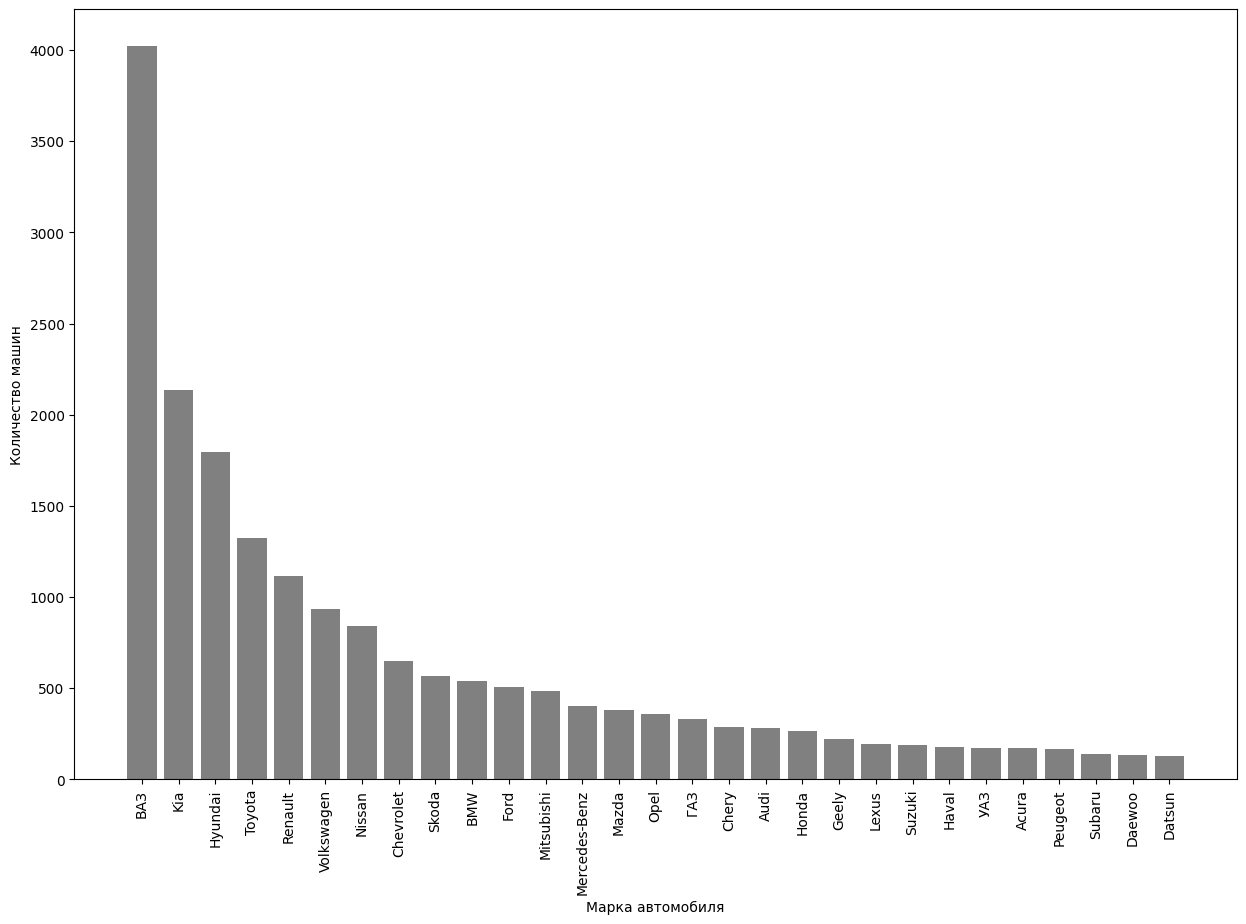

In [413]:
brand_counts = df['Brand'].value_counts()

plt.figure(figsize=(15, 10)) 
plt.bar(brand_counts.index, brand_counts.values, color='gray')
plt.xlabel('Марка автомобиля')
plt.ylabel('Количество машин')
plt.xticks(rotation=90)  # Поворачиваем подписи по оси X для лучшей читаемости
plt.show()

`Model` - данные о модели автомобилей, самых популярных марок на авито.ру

In [414]:
print(f'Всего в датасета моделей:= {df['Model'].nunique()}')

Всего в датасета моделей:= 703


In [415]:
df['Model'].unique()

array(['A6', 'Q8', 'A5', 'Q7', 'A4', 'A6 Allroad Quattro', 'Q5', 'Q3',
       'A3', 'A4 Allroad Quattro', '100', 'A1', 'A8', 'A7', '80',
       'e-tron Sportback', 'e-tron', 'TT', 'S8', 'TTS', 'Q4 e-tron', '90',
       'SQ8', 'Q6', 'X7', '3 серия GT', 'X3', '5 серия', 'X5', 'X6',
       '3 серия', '7 серия', '1 серия', 'X1', 'iX', '4 серия',
       '5 серия GT', '2 серия Gran Coupe', '2 серия Active Tourer', 'X4',
       'Z4', 'X6 M', '8 серия', 'M5', '4 серия Gran Coupe', 'M4', 'i3',
       '6 серия GT', 'XM', 'M3', 'X3 M', '6 серия', 'X4 M', 'X5 M',
       'Tiggo 8 Pro Max', 'Tiggo 2 Pro', 'eQ5', 'Tiggo 7 Pro', 'Tiggo 3',
       'Tiggo 4', 'Tiggo (T11)', 'Tiggo 8 Pro', 'Very', 'IndiS (S18D)',
       'Amulet (A15)', 'Tiggo 7', 'Tiggo 8', 'Explore 06', 'Tiggo 4 Pro',
       'Kimo (A1)', 'Tiggo 2', 'Tiggo 5', 'Tiggo 7 Pro Max',
       'Bonus (A13)', 'Bonus 3 (E3)', 'Tiggo 7 Plus', 'M11 (A3)',
       'QQ6 (S21)', 'Sweet (QQ)', 'Fora (A21)', 'Tiggo 9', 'Cruze',
       'Aveo', 'Monza', 'La

Топ 50 самых популярных моделей автомобилей

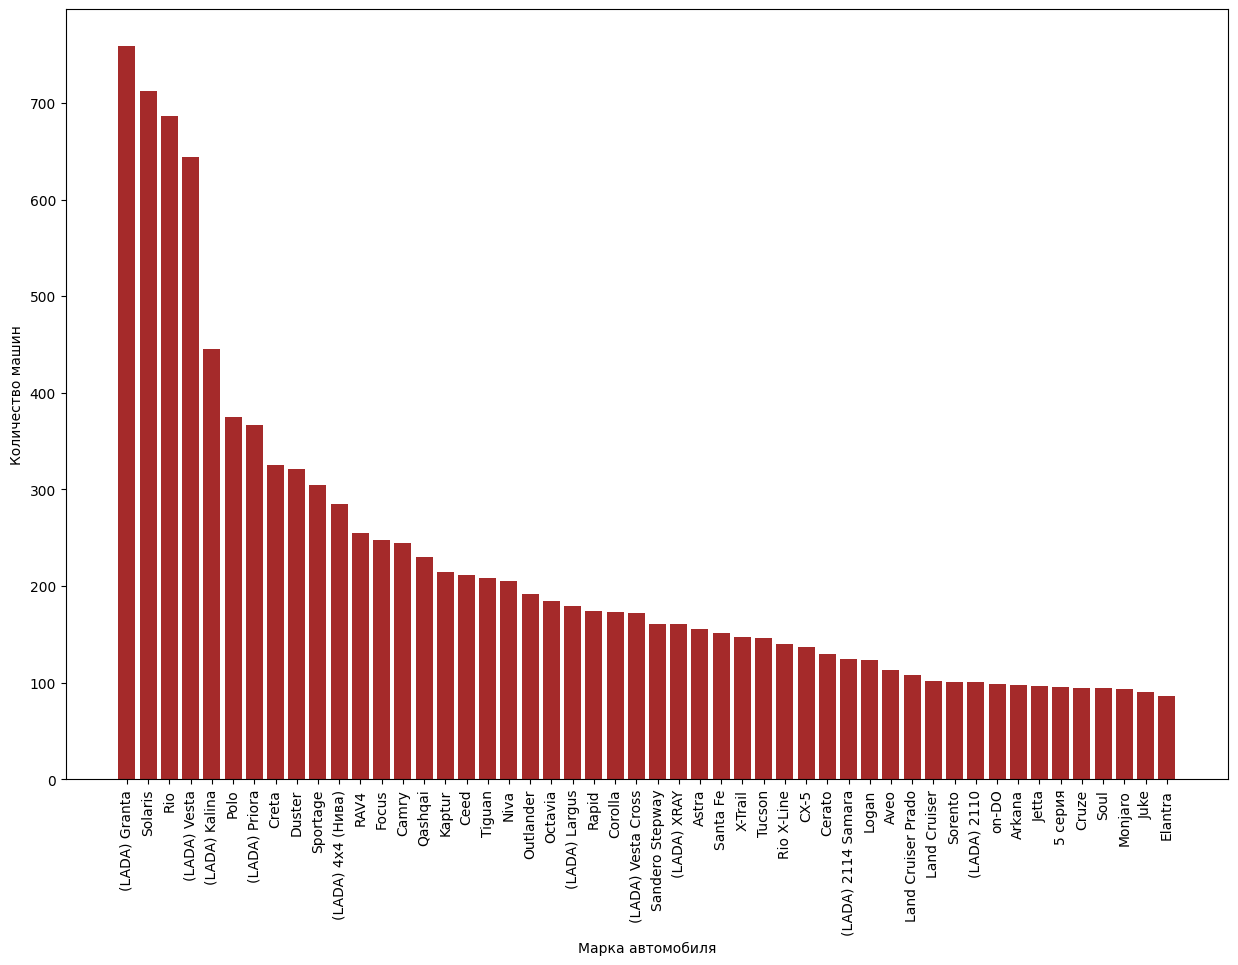

In [416]:
model_counts = df['Model'].value_counts().nlargest(50)

plt.figure(figsize=(15, 10)) 
plt.bar(model_counts.index, model_counts.values, color='brown')
plt.xlabel('Марка автомобиля')
plt.ylabel('Количество машин')
plt.xticks(rotation=90)  # Поворачиваем подписи по оси X для лучшей читаемости
plt.show()

In [417]:
def get_bar_stat(Name, signature, color_1='royalblue', color_2='forestgreen'):
    # Гистограмма по количеству автомобилей
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    counts = df[Name].value_counts()
    plt.bar(counts.index, counts.values, color=color_1)
    plt.xlabel(signature)
    plt.ylabel('Количество автомобилей')
    plt.xticks(rotation=90)

    # Гистограмма по средней цене автомобиля 
    plt.subplot(1, 2, 2)
    avg_price = df.groupby(Name)['Price'].mean()
    avg_price = avg_price.sort_values(ascending=False)
    plt.bar(avg_price.index, avg_price.values, color=color_2)
    plt.xlabel(signature)
    plt.ylabel('Средняя цена автомобиля')
    plt.xticks(rotation=90)

    plt.show()

`Transmission` - тип коробки передач автомобиля, которая содержит следующие аббревиатуры

* CVT - вариаторная трансмиссия
* AT - автоматическая трансмиссия
* AMT - роботизированная механическая трансмиссия
* MT - механическая трансмиссия (коробка передач)

In [418]:
print(f'Всего типов коробок передач в датасете:= {df['Transmission'].nunique()}')

Всего типов коробок передач в датасете:= 5


In [419]:
df['Transmission'].unique()

array(['CVT', 'AT', 'AMT', 'MT', 'K5'], dtype=object)

K5 - явно лишний

In [420]:
df[df['Transmission'] == 'K5']

,Brand,Model,Price,Condition,Transmission,Engine_capacity,Mileage,Body_type,Drive_type,Engine_type,City,Link,Photo
6138,Kia,,2650000,Не битая,K5,1.6 AT (180 л.с.),43 000 км,седан,передний,бензин,с. Лопатино,https://www.avito.ru/samara/avtomobili/kia_k5_...,NaN


In [421]:
index_trans_K5 = df[df['Transmission'] == 'K5'].index
index_trans_K5

Index([6138], dtype='int64')

In [422]:
df.at[index_trans_K5[0], 'Model'] = 'Rio'
df.at[index_trans_K5[0], 'Transmission'] = 'AT'

In [423]:
print(f'Всего типов коробок передач в датасете:= {df['Transmission'].nunique()}')

Всего типов коробок передач в датасете:= 4


In [424]:
print(f'Типы коробок передач в датасете:= {df['Transmission'].unique()}')

Типы коробок передач в датасете:= ['CVT' 'AT' 'AMT' 'MT']


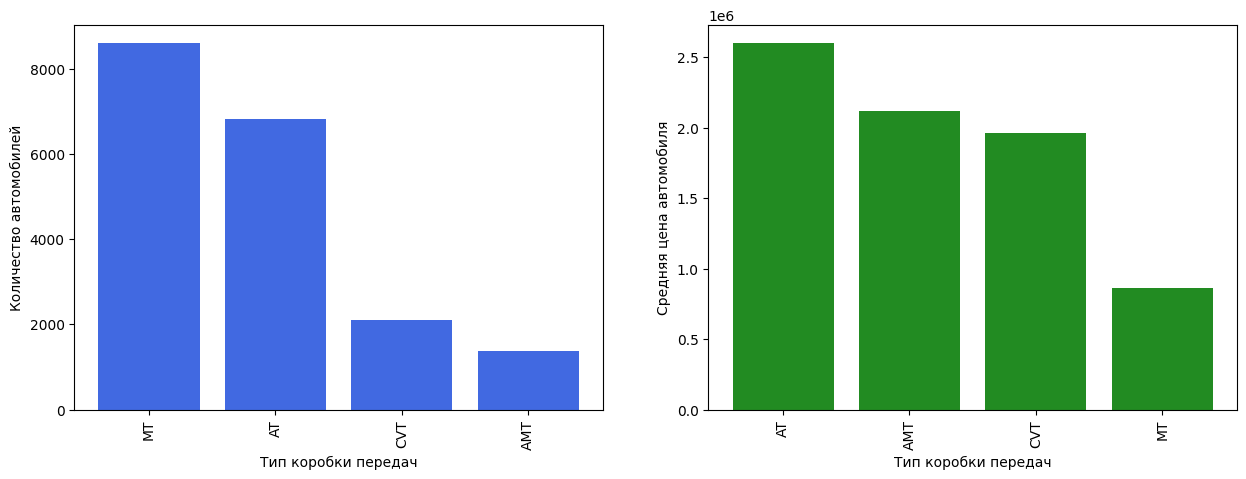

In [425]:
get_bar_stat(Name='Transmission', signature='Тип коробки передач')

`Price` - цена автомобиля

**Задача** - Проверить наличие выбросов

In [426]:
df['Price'].head(5)

0    1650000
1    8450000
2    4990000
3    5890000
4    2399000
Name: Price, dtype: int64

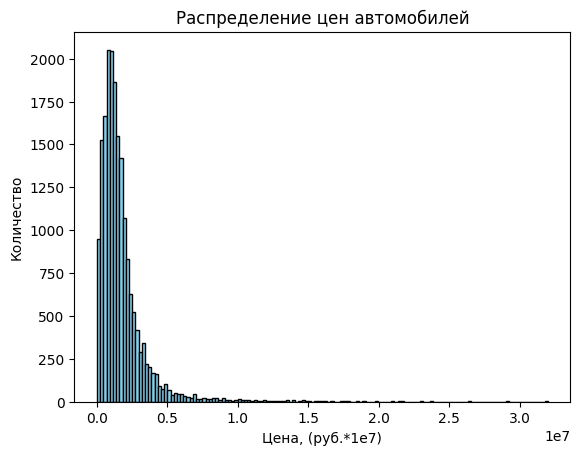

In [427]:
counts, bins, patches = plt.hist(df['Price'], bins='scott', color='skyblue', edgecolor='black')
plt.xlabel('Цена, (руб.*1e7)')
plt.ylabel('Количество')
plt.title('Распределение цен автомобилей')
plt.show()

Построение boxplot

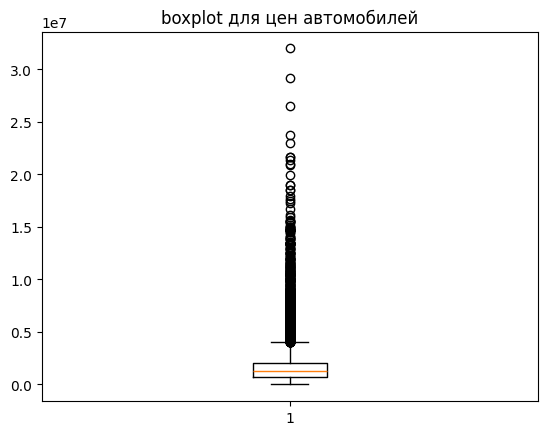

In [428]:
plt.boxplot(df['Price'])
plt.title('boxplot для цен автомобилей')
plt.show()

In [429]:
# Вычисление Z-оценки
z_scores = stats.zscore(df['Price'])
threshold = 3
outliers = df['Price'][z_scores > threshold]
print('Выбросы по Z-оценке:', outliers)

Выбросы по Z-оценке: 1         8450000
23       13600000
55        7300000
65        9950000
85       11500000
           ...   
18833     7500000
18841     8700000
18844     8300000
18851     7100000
18868     8650000
Name: Price, Length: 374, dtype: int64


In [430]:
# Вычисление квартилей
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Price'] < lower_bound) | (df['Price'] > upper_bound)]['Price']
print('Выбросы по квартилям:', outliers)

Выбросы по квартилям: 1        8450000
2        4990000
3        5890000
7        5450000
13       5190000
          ...   
18858    5670000
18863    5400000
18868    8650000
18873    4300000
18877    4100000
Name: Price, Length: 1173, dtype: int64


Статистические методы не показали ожидаемого результата, учитываться не будут

Имеются как анамольно маленькие значения, так и большие

In [431]:
df.sort_values(by='Price').head(5)

,Brand,Model,Price,Condition,Transmission,Engine_capacity,Mileage,Body_type,Drive_type,Engine_type,City,Link,Photo
16532,ВАЗ,(LADA) 2115 Samara,1000,Не битая,MT,1.5 MT (76 л.с.),250 000 км,седан,передний,бензин,с. Бобровка,https://www.avito.ru/spiridonovka/avtomobili/v...,NaN
18369,ГАЗ,31105 Волга,1000,Не битая,MT,2.3 MT (131 л.с.),200 000 км,седан,задний,бензин,Тольятти,https://www.avito.ru/tolyatti/avtomobili/gaz_3...,NaN
3016,Honda,Civic,10000,Не битая,AT,1.6 AT (120 л.с.),123 321 км,универсал,полный,бензин,Тольятти,https://www.avito.ru/tolyatti/avtomobili/honda...,NaN
15502,ВАЗ,(LADA) 1111 Ока,25000,Не битая,MT,0.7 MT (33 л.с.),75 000 км,хетчбэк,передний,бензин,Самара,https://www.avito.ru/samara/avtomobili/vaz_lad...,NaN
7766,Mercedes-Benz,C-класс,30000,Битая,MT,1.8 MT (122 л.с.),245 000 км,седан,задний,бензин,Самара,https://www.avito.ru/samara/avtomobili/mercede...,NaN


<Axes: title={'center': 'Статистика по маркам автомобилей с ценой менее 50т.р.'}, ylabel='Brand'>

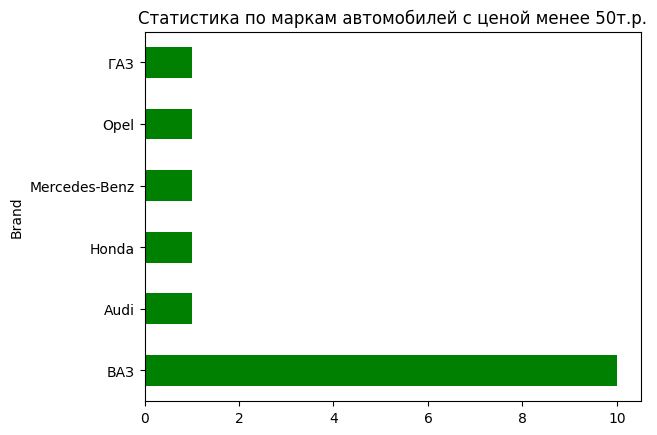

In [432]:
df[df['Price'] < 50000]['Brand'].value_counts().plot(kind='barh', title='Статистика по маркам автомобилей с ценой менее 50т.р.', color='green')

После анализа обьявлений автомобилей с ценой менее 50.000р, было принято решение удалить их из датасета, так как большинство данных обьявления представляю собой продажу запчастей (особенно если состояние - Битая)

In [433]:
df = df[df['Price'] > 50000]

In [434]:
df.sort_values(by='Price', ascending=False).head(5)

,Brand,Model,Price,Condition,Transmission,Engine_capacity,Mileage,Body_type,Drive_type,Engine_type,City,Link,Photo
7771,Mercedes-Benz,Maybach S-класс,31990000,Не битая,AT,4 AT (503 л.с.),3 929 км,седан,полный,бензин,Самара,https://www.avito.ru/samara/avtomobili/mercede...,NaN
7783,Mercedes-Benz,G-класс AMG,29200000,Не битая,AT,4 AT (585 л.с.),830 км,внедорожник,полный,бензин,Самара,https://www.avito.ru/samara/avtomobili/mercede...,NaN
7977,Mercedes-Benz,S-класс AMG,26500000,Не битая,AT,4 AT (802 л.с.),10 км,седан,полный,гибрид,Нижний Новгород,https://www.avito.ru/nizhniy_novgorod/avtomobi...,NaN
331,BMW,X7,23800000,Не битая,AT,3.0 AT (340 л.с.),215 км,внедорожник,полный,дизель,Нижний Новгород,https://www.avito.ru/nizhniy_novgorod/avtomobi...,NaN
359,BMW,X7,23000000,Не битая,AT,3 AT (380 л.с.),55 км,внедорожник,полный,бензин,Нижний Новгород,https://www.avito.ru/nizhniy_novgorod/avtomobi...,NaN


<Axes: title={'center': 'Статистика по маркам автомобилей с ценой более 20.000т.р.'}, ylabel='Brand'>

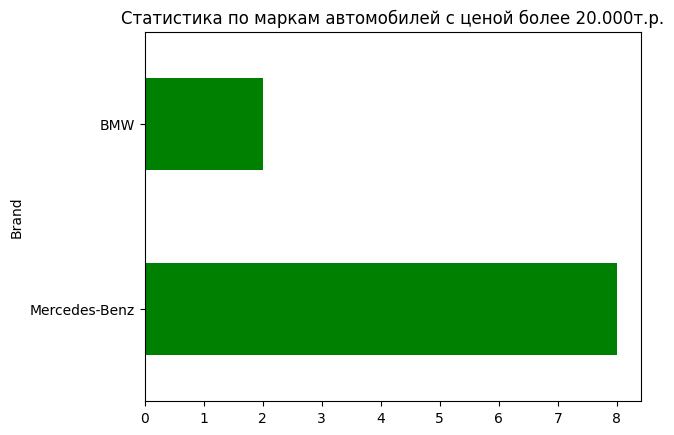

In [435]:
df[df['Price'] > 20000000]['Brand'].value_counts().plot(kind='barh', title='Статистика по маркам автомобилей с ценой более 20.000т.р.', color='green')

После анализа было выявлено что обьявления представляют собой автомобили премиум класса, зачастую продаваемые различными компаниями 

* Проанализировать работу модели с этими обьявлениями и без них, сравнить результаты

`Condition` - состояние автомобиля (Битая или не битая)

**Задачи** 
1) Перевести в бинарную систему счислени, 1 - Битая, 0 - Не битая
2) Проверить на начилие выбросов

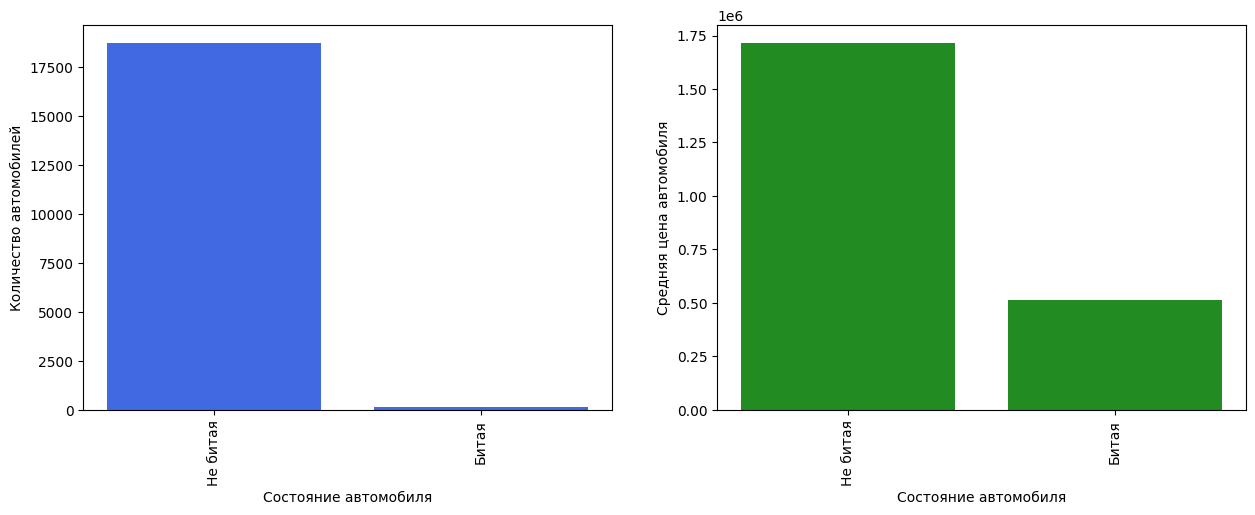

In [436]:
get_bar_stat(Name='Condition', signature='Состояние автомобиля')

In [437]:
df['Condition'] = df['Condition'].replace({'Битая': 1, 'Не битая': 0})
df['Condition'].unique()

array([0, 1], dtype=int64)

`Engine_capacity` (в дальнейшем `Count_horsepower`) - данные двигателя представленные в формате (обьем двигателя/коробка передач/количество лошадиных сил)

*Данные о коробке передач находятся в `Transmission`. Так как в датасете присутствуют как автомобили с ДВС, так и с электродвигателем, то было решено не учитывать данные об обьеме двигателя, но данные о количестве лошадиных сил будут учитываться, к тому же эти две переменные очень сильно коррелируют между собой, что может сказаться на работе модели*

**Задача** 
1) Сохранить данные о количестве лошадиных сил
2) Проверить на наличие выбросов 

In [438]:
unique_energe_capacity  = list(df['Engine_capacity'].unique())
unique_energe_capacity[:10]

['2 CVT (180\xa0л.с.)',
 '3.0 AT (286\xa0л.с.)',
 '2.0 AMT (190\xa0л.с.)',
 '2 AMT (249\xa0л.с.)',
 '3 AT (245\xa0л.с.)',
 '2.0 AMT (150\xa0л.с.)',
 '2.8 CVT (190\xa0л.с.)',
 '3 AT (286\xa0л.с.)',
 '2 AMT (163\xa0л.с.)',
 '2 AMT (184\xa0л.с.)']

In [439]:
df["Count_horsepower"] = df["Engine_capacity"].apply(lambda x: re.findall(r"\d+", x)[-1]).astype(int)
df = df.drop(columns=['Engine_capacity'])
df['Count_horsepower']

0        180
1        286
2        190
3        249
4        245
        ... 
18905    290
18906    300
18907    300
18908    290
18909    300
Name: Count_horsepower, Length: 18882, dtype: int32

In [440]:
new_order = ['Brand', 'Model', 'Price', 'Condition', 'Transmission', 'Mileage', 'Body_type', 'Drive_type', 'Count_horsepower', 'Engine_type', 'City', 'Link', 'Photo']
df = df.reindex(columns=new_order)

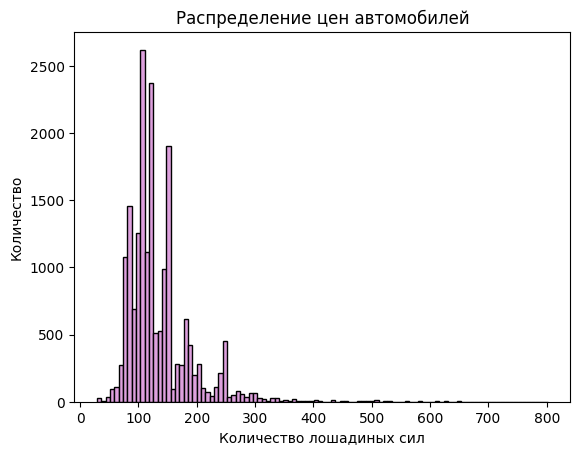

In [441]:
counts, bins, patches = plt.hist(df['Count_horsepower'], bins='scott', color='plum', edgecolor='black')
plt.xlabel('Количество лошадиных сил')
plt.ylabel('Количество')
plt.title('Распределение цен автомобилей')
plt.show()

In [442]:
df[df['Count_horsepower'] < 70]

,Brand,Model,Price,Condition,Transmission,Mileage,Body_type,Drive_type,Count_horsepower,Engine_type,City,Link,Photo
941,Chery,Sweet (QQ),85000,0,MT,108 089 км,хетчбэк,передний,52,бензин,Самара,https://www.avito.ru/samara/avtomobili/chery_s...,NaN
1011,Chery,Sweet (QQ),210000,0,MT,89 999 км,хетчбэк,передний,52,бензин,Самара,https://www.avito.ru/samara/avtomobili/chery_s...,NaN
1041,Chery,Sweet (QQ),130000,0,MT,200 000 км,хетчбэк,передний,52,бензин,Отрадный,https://www.avito.ru/otradnyy/avtomobili/chery...,NaN
1071,Chery,QQ6 (S21),190000,0,MT,128 000 км,лифтбек,передний,68,бензин,Тольятти,https://www.avito.ru/tolyatti/avtomobili/chery...,NaN
1157,Chevrolet,Spark,910000,0,AT,88 000 км,хетчбэк,передний,67,бензин,Уфа,https://www.avito.ru/ufa/avtomobili/chevrolet_...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18529,ГАЗ,69,500000,0,MT,54 000 км,внедорожник,полный,55,бензин,Тольятти,https://www.avito.ru/tolyatti/avtomobili/gaz_6...,NaN
18531,ГАЗ,21 Волга,350000,0,MT,87 169 км,седан,задний,65,бензин,Жигулёвск,https://www.avito.ru/zhigulevsk/avtomobili/gaz...,NaN
18557,ГАЗ,А,130000,0,MT,50 000 км,кабриолет,задний,40,бензин,пос. Раевка,https://www.avito.ru/samarskaya_oblast_krasnyy...,NaN
18560,ГАЗ,69,500000,0,MT,54 000 км,внедорожник,полный,55,бензин,Тольятти,https://www.avito.ru/tolyatti/avtomobili/gaz_6...,NaN


<Axes: title={'center': 'Статистика по маркам автомобилей с мощностью менее 50 л.с.'}, ylabel='Brand'>

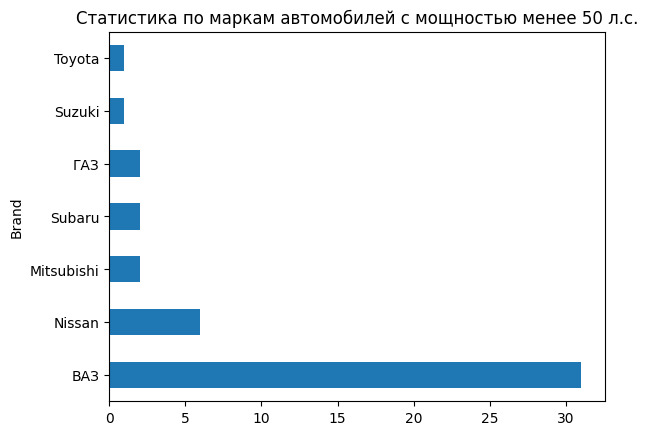

In [443]:
df[df['Count_horsepower'] < 50]['Brand'].value_counts().plot(kind='barh', title='Статистика по маркам автомобилей с мощностью менее 50 л.с.')

In [444]:
df[df['Count_horsepower'] > 650]

,Brand,Model,Price,Condition,Transmission,Mileage,Body_type,Drive_type,Count_horsepower,Engine_type,City,Link,Photo
630,BMW,XM,7000000,0,AT,3 700 км,внедорожник,полный,653,гибрид,Нижний Новгород,https://www.avito.ru/nizhniy_novgorod/avtomobi...,NaN
668,BMW,XM,7000000,0,AT,3 700 км,внедорожник,полный,653,гибрид,Нижний Новгород,https://www.avito.ru/nizhniy_novgorod/avtomobi...,NaN
724,BMW,XM,17300000,0,AT,6 950 км,внедорожник,полный,653,гибрид,Нижний Новгород,https://www.avito.ru/nizhniy_novgorod/avtomobi...,NaN
7977,Mercedes-Benz,S-класс AMG,26500000,0,AT,10 км,седан,полный,802,гибрид,Нижний Новгород,https://www.avito.ru/nizhniy_novgorod/avtomobi...,NaN


<Axes: title={'center': 'Статистика по маркам автомобилей с мощностью более 650 л.с.'}, ylabel='Brand'>

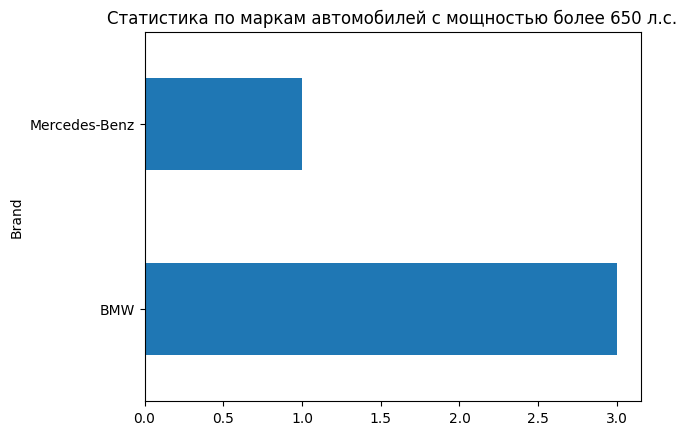

In [445]:
df[df['Count_horsepower'] > 650]['Brand'].value_counts().plot(kind='barh', title='Статистика по маркам автомобилей с мощностью более 650 л.с.')

In [446]:
df = df[(df['Count_horsepower']<= 650) & (df['Count_horsepower']>=50)]

`Mileage` - пробег автомобиля (км.)

**Задача** 
1) Привести данные к целочисленному формату
2) Проверить на наличие выбросов

In [447]:
df['Mileage'] = df['Mileage'].str.replace('\xa0', '').str.replace('км', '').astype(int)

In [448]:
df['Mileage'].info()

<class 'pandas.core.series.Series'>
Index: 18833 entries, 0 to 18909
Series name: Mileage
Non-Null Count  Dtype
--------------  -----
18833 non-null  int32
dtypes: int32(1)
memory usage: 220.7 KB


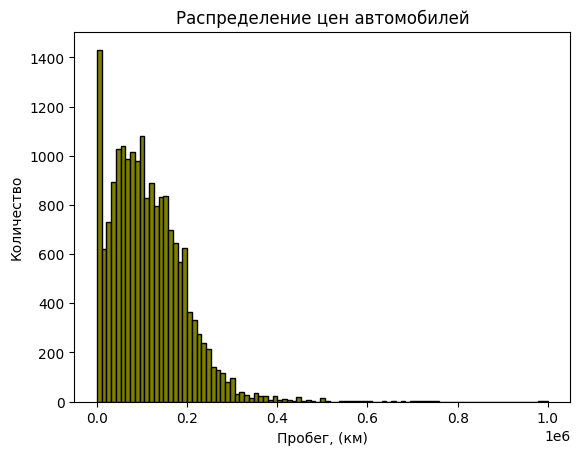

In [449]:
counts, bins, patches = plt.hist(df['Mileage'], bins='scott', color='olive', edgecolor='black')
plt.xlabel('Пробег, (км)')
plt.ylabel('Количество')
plt.title('Распределение цен автомобилей')
plt.show()

Наблюдается большое множество автомобилей с маленьки пробегом -> не выброс

А вот значения с аномально большим пробегом нужно проверить

In [450]:
df[df['Mileage'] > 700000]

,Brand,Model,Price,Condition,Transmission,Mileage,Body_type,Drive_type,Count_horsepower,Engine_type,City,Link,Photo
87,Audi,80,80000,1,MT,737380,седан,передний,90,бензин,Самара,https://www.avito.ru/samara/avtomobili/audi_80...,NaN
240,Audi,90,100000,1,MT,1000000,седан,передний,136,бензин,Самара,https://www.avito.ru/samara/avtomobili/audi_90...,NaN
2189,Ford,Mondeo,280530,0,MT,716000,седан,передний,125,бензин,Тольятти,https://www.avito.ru/tolyatti/avtomobili/ford_...,NaN
6841,Kia,Sportage,2300000,0,AT,710000,внедорожник,передний,186,дизель,Владивосток,https://www.avito.ru/vladivostok/avtomobili/ki...,NaN
9890,Peugeot,407,1292933,0,MT,980000,седан,передний,116,бензин,Шигоны,https://www.avito.ru/shigony/avtomobili/peugeo...,NaN
9918,Peugeot,Boxer,890000,0,MT,750000,микроавтобус,передний,130,дизель,Тольятти,https://www.avito.ru/tolyatti/avtomobili/peuge...,NaN
14375,ВАЗ,(LADA) 2110,70000,0,MT,999990,седан,передний,90,бензин,Богатое,https://www.avito.ru/bogatoe/avtomobili/vaz_la...,NaN
17878,ВАЗ,(LADA) 2110,99999,0,MT,999999,седан,передний,79,бензин,пос. Приморский,https://www.avito.ru/tolyatti/avtomobili/vaz_l...,NaN
18342,ГАЗ,ГАЗель 3302,650000,0,MT,731000,фургон,задний,140,бензин,Тольятти,https://www.avito.ru/tolyatti/avtomobili/gaz_g...,NaN


После анализа обьявлений автомобилей с пробегом больше 700.000кm, было принято решение удалить их из датасета, так как большинство данных обьявления представляю собой продажу запчастей (особенно если состояние - Битая)

In [451]:
df[(df['Mileage'] > 500000) & (df['Condition'] == 1)]

,Brand,Model,Price,Condition,Transmission,Mileage,Body_type,Drive_type,Count_horsepower,Engine_type,City,Link,Photo
87,Audi,80,80000,1,MT,737380,седан,передний,90,бензин,Самара,https://www.avito.ru/samara/avtomobili/audi_80...,NaN
240,Audi,90,100000,1,MT,1000000,седан,передний,136,бензин,Самара,https://www.avito.ru/samara/avtomobili/audi_90...,NaN


In [452]:
df = df.drop(df[df['Mileage'] > 700000].index)

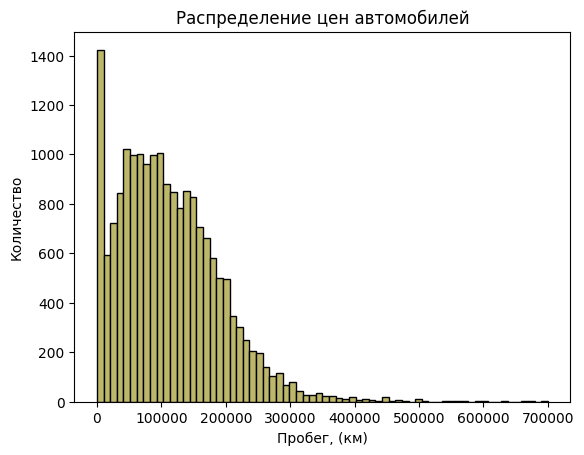

In [453]:
counts, bins, patches = plt.hist(df['Mileage'], bins='scott', color='darkkhaki', edgecolor='black')
plt.xlabel('Пробег, (км)')
plt.ylabel('Количество')
plt.title('Распределение цен автомобилей')
plt.show()

`Body_type` - Тип кузова автомобиля

In [454]:
print(f'Всего типов кузова в датасете:= {df['Body_type'].nunique()}')

Всего типов кузова в датасете:= 11


In [455]:
print(f'Типов кузова в датасете:= {df['Body_type'].unique()}')

Типов кузова в датасете:= ['седан' 'внедорожник' 'лифтбек' 'универсал' 'хетчбэк' 'купе' 'минивэн'
 'кабриолет' 'фургон' 'микроавтобус' 'пикап']


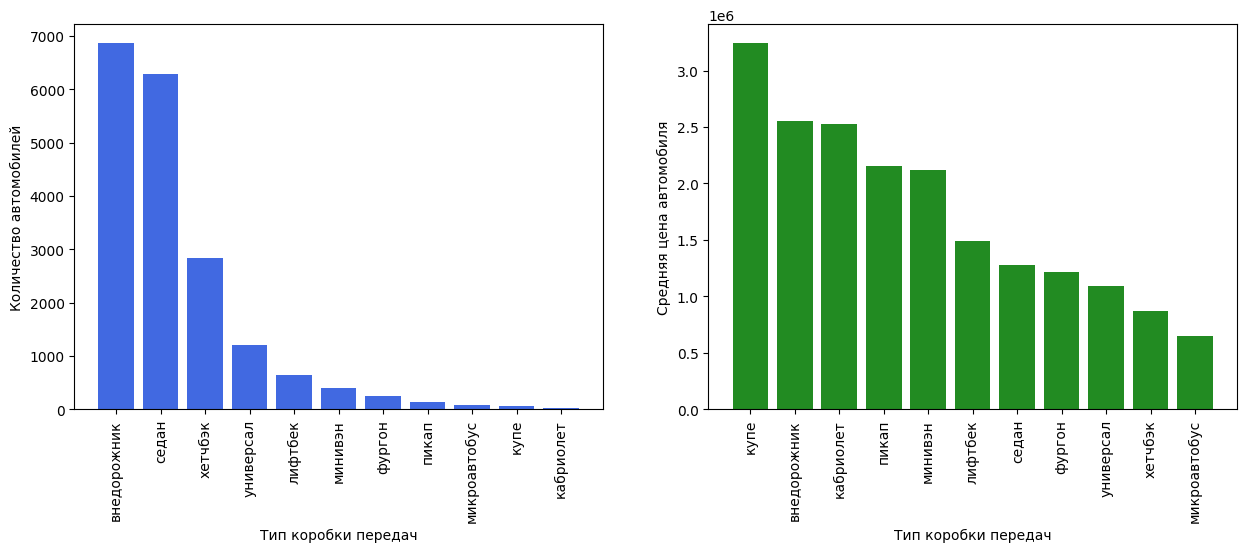

In [456]:
get_bar_stat(Name='Body_type', signature='Тип коробки передач')

`Drive_type` - характеристика привода автомобиля, которое передает энергию от двигателя на колеса.

In [457]:
df['Drive_type'].unique()

array(['передний', 'полный', 'задний'], dtype=object)

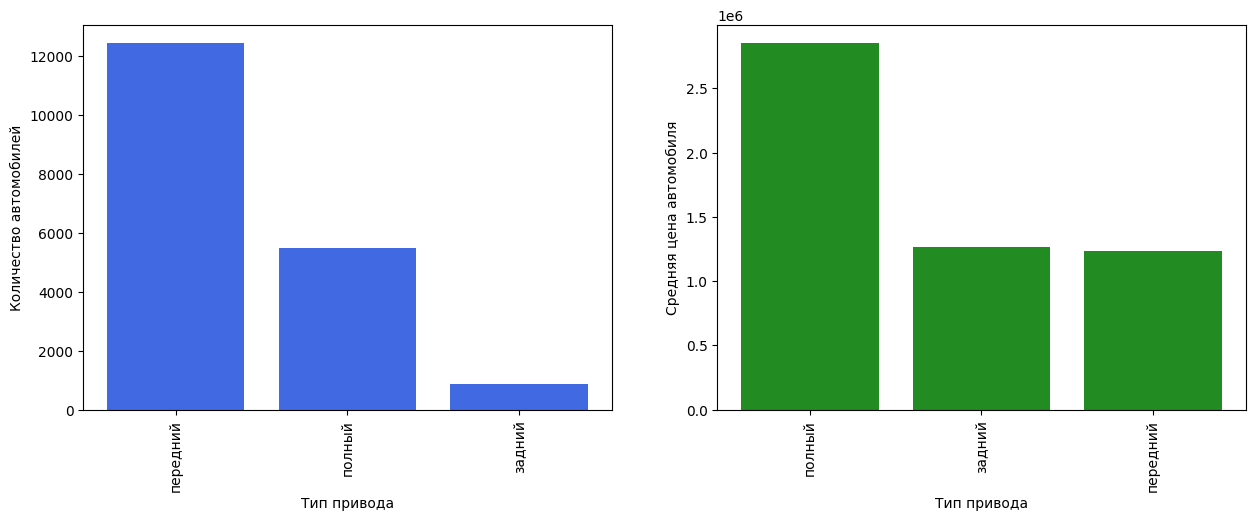

In [458]:
get_bar_stat(Name='Drive_type', signature='Тип привода')

`Engine_type` - тип топлива 

In [459]:
print(f'Всего типов топлива в датасете:= {df['Engine_type'].unique()}')

Всего типов топлива в датасете:= ['бензин' 'дизель' 'электро' 'гибрид' 'газ']


In [460]:
df['Engine_type'].value_counts()

Engine_type
бензин     16974
дизель      1495
гибрид       282
электро       54
газ           19
Name: count, dtype: int64

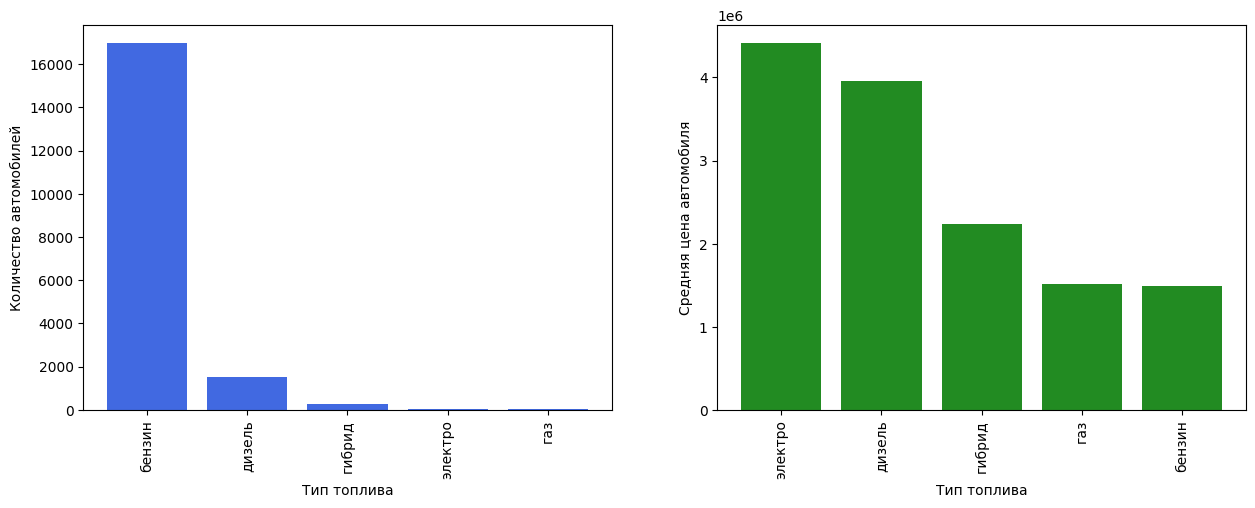

In [461]:
get_bar_stat(Name='Engine_type', signature='Тип топлива')

`City` - город продажи автомобиля

In [462]:
list(df['City'].unique())[:20]

['Самара',
 'Тольятти',
 'с. Ягодное',
 'Нижний Новгород',
 'с. Кинель-Черкассы',
 'Казань',
 'Уфа',
 'Пермь',
 'д. Афонино',
 'Набережные Челны',
 'Ижевск',
 'Энгельс',
 'Саранск',
 'Нижнекамск',
 'пос. Придорожный',
 'пос. Пригородный',
 'д. Песьянка',
 'Новокуйбышевск',
 'Стерлитамак',
 'Ульяновск']

`City`, `Link`, `Photo` - данные с информацией для пользователя приложения, при обучении модели учитываться не будут

### Итоги 2 этапа

In [467]:
print(f'Обьем данных до предобработки {df_old.shape}')

Обьем данных до предобработки (18910, 14)


In [469]:
print(f'Обьем данных до предобработки {df.shape}')

Обьем данных до предобработки (18824, 13)


In [464]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18824 entries, 0 to 18909
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             18824 non-null  object 
 1   Model             18824 non-null  object 
 2   Price             18824 non-null  int64  
 3   Condition         18824 non-null  int64  
 4   Transmission      18824 non-null  object 
 5   Mileage           18824 non-null  int32  
 6   Body_type         18824 non-null  object 
 7   Drive_type        18824 non-null  object 
 8   Count_horsepower  18824 non-null  int32  
 9   Engine_type       18824 non-null  object 
 10  City              18824 non-null  object 
 11  Link              18824 non-null  object 
 12  Photo             0 non-null      float64
dtypes: float64(1), int32(2), int64(2), object(8)
memory usage: 1.9+ MB


- Добавлены столбцы `Brand`, `Model`, `Transmission`
- Изменено название с Engine_capacity на `Count_horsepower`
- Преобразование в числовые данные `Condition`, `Mileage`, `Count_horsepower`
- Удаление анамальных значений из столбцов `Price`, `Mileage`, `Count_horsepower`

In [465]:
df.head()

,Brand,Model,Price,Condition,Transmission,Mileage,Body_type,Drive_type,Count_horsepower,Engine_type,City,Link,Photo
0,Audi,A6,1650000,0,CVT,240000,седан,передний,180,бензин,Самара,https://www.avito.ru/samara/avtomobili/audi_a6...,NaN
1,Audi,Q8,8450000,0,AT,67200,внедорожник,полный,286,дизель,Самара,https://www.avito.ru/samara/avtomobili/audi_q8...,NaN
2,Audi,A5,4990000,0,AMT,32,лифтбек,передний,190,бензин,Самара,https://www.avito.ru/samara/avtomobili/audi_a5...,NaN
3,Audi,A5,5890000,0,AMT,5400,лифтбек,полный,249,бензин,Самара,https://www.avito.ru/samara/avtomobili/audi_a5...,NaN
4,Audi,Q7,2399000,0,AT,140000,внедорожник,полный,245,дизель,Самара,https://www.avito.ru/samara/avtomobili/audi_q7...,NaN


Этап 3. Исследовательский анализ данных

Этап 4. Отбор и выделение признаков

Этап 5. Обучение модели

Этап 6. Оценка качества модели